In [1]:
import pandas_plink as pp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import tarfile
import gzip

In [2]:
genotype_data = '../data/LDREF.tar.bz2'
phenotype_data = '../data/GD462.GeneQuantRPKM.50FN.samplename.resk10.txt'

#G = pp.read_plink1_bin(os.path.join(pp.get_data_folder(), "../data/LDREF/1000G.EUR.*.BED"), verbose=False)
#G

In [3]:
# alleles = .bim (snp. came from vcf file (txt file))
# samples = .fam (family id)
# genotypes = .bed (genotypes). Rows and columns defined by alleles and samples
(alleles, samples, genotypes) = pp.read_plink("../data/LDREF/1000G.EUR.*",
                             verbose=False)
genotypes = pd.DataFrame(genotypes.compute())

In [4]:
alleles

,chrom,snp,cm,pos,a0,a1,i
0,1,rs3094315,0.488776,752566,G,A,0
1,1,rs3131972,0.488868,752721,A,G,1
2,1,rs3131969,0.489734,754182,A,G,2
3,1,rs1048488,0.492507,760912,C,T,3
4,1,rs3115850,0.492605,761147,T,C,4
...,...,...,...,...,...,...,...
1190316,9,rs9777369,180.358490,141018423,T,C,1190316
1190317,9,rs9410073,180.359980,141022295,A,G,1190317
1190318,9,rs17583562,180.361560,141026318,A,G,1190318
1190319,9,rs11137379,180.362530,141027939,A,G,1190319


In [1]:
genotypes

NameError: name 'genotypes' is not defined

In [5]:
alleles['snp'].nunique()

1190321

In [6]:
samples

,fid,iid,father,mother,gender,trait,i
0,HG00096,HG00096,0,0,0,-9,0
1,HG00097,HG00097,0,0,0,-9,1
2,HG00099,HG00099,0,0,0,-9,2
3,HG00101,HG00101,0,0,0,-9,3
4,HG00102,HG00102,0,0,0,-9,4
...,...,...,...,...,...,...,...
484,NA20822,NA20822,0,0,0,-9,484
485,NA20826,NA20826,0,0,0,-9,485
486,NA20827,NA20827,0,0,0,-9,486
487,NA20828,NA20828,0,0,0,-9,487


In [7]:
samples['trait'].value_counts()

trait
-9    489
Name: count, dtype: Int64

In [74]:
allele_occ_df = genotypes.copy()

allele_freq_df = allele_occ_df.copy(deep=True)
allele_freq_df['snp'] = alleles['snp']
allele_freq_df['freq_0'] = allele_occ_df.apply(lambda x: x == 0).sum(axis=1) / 489
#allele_freq_df['freq_1'] = allele_occ_df.apply(lambda x: x == 1).sum(axis=1) / 489
#allele_freq_df['freq_2'] = allele_occ_df.apply(lambda x: x == 2).sum(axis=1) / 489
allele_freq_df['freq_12'] = 1 - allele_freq_df['freq_0']#allele_occ_df.apply(lambda x: x != 0).sum(axis=1) / 489#allele_freq_df['freq_1'] + allele_freq_df['freq_1']
#allele_freq_df['freq_12'] = allele_occ_df.apply(lambda x: (x == 1) or (x == 2), axis=1).sum(axis=1) / 489
allele_freq_df

,0,1,2,3,4,5,6,7,8,9,...,482,483,484,485,486,487,488,snp,freq_0,freq_12
0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,2.0,rs3094315,0.014315,0.985685
1,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,2.0,rs3131972,0.014315,0.985685
2,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,2.0,rs3131969,0.014315,0.985685
3,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,2.0,rs1048488,0.016360,0.983640
4,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,2.0,rs3115850,0.016360,0.983640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190316,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,rs9777369,0.002045,0.997955
1190317,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,2.0,1.0,2.0,rs9410073,0.004090,0.995910
1190318,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,rs17583562,0.014315,0.985685
1190319,1.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,1.0,2.0,...,0.0,2.0,2.0,2.0,2.0,1.0,1.0,rs11137379,0.094070,0.905930


In [13]:
allele_freq_df['MAF'] = allele_freq_df[['freq_0', 'freq_12']].min(axis=1)
allele_freq_df

,snp,0,1,2,3,4,5,6,7,8,...,484,485,486,487,488,freq_0,freq_1,freq_2,freq_12,MAF
0,rs3094315,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,1.0,2.0,0.014315,0.298569,0.687117,0.597137,0.014315
1,rs3131972,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,1.0,2.0,0.014315,0.300613,0.685072,0.601227,0.014315
2,rs3131969,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,1.0,2.0,0.014315,0.233129,0.752556,0.466258,0.014315
3,rs1048488,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,1.0,2.0,0.01636,0.294479,0.689162,0.588957,0.01636
4,rs3115850,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,1.0,2.0,0.01636,0.296524,0.687117,0.593047,0.01636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190316,rs9777369,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,0.002045,0.038855,0.9591,0.07771,0.002045
1190317,rs9410073,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,2.0,0.00409,0.128834,0.867076,0.257669,0.00409
1190318,rs17583562,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,0.014315,0.163599,0.822086,0.327198,0.014315
1190319,rs11137379,1.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,1.0,...,2.0,2.0,2.0,1.0,1.0,0.09407,0.349693,0.556237,0.699387,0.09407


In [14]:
allele_freq_df['common_low_rare'] = allele_freq_df['MAF'].apply(lambda x: 0 if x > 0.05 else (1 if (x <= 0.05 and x > 0.01) else 2))
allele_freq_df

,snp,0,1,2,3,4,5,6,7,8,...,485,486,487,488,freq_0,freq_1,freq_2,freq_12,MAF,common_low_rare
0,rs3094315,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,1.0,2.0,0.014315,0.298569,0.687117,0.597137,0.014315,1
1,rs3131972,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,1.0,2.0,0.014315,0.300613,0.685072,0.601227,0.014315,1
2,rs3131969,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,1.0,2.0,0.014315,0.233129,0.752556,0.466258,0.014315,1
3,rs1048488,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,1.0,2.0,0.01636,0.294479,0.689162,0.588957,0.01636,1
4,rs3115850,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,1.0,2.0,0.01636,0.296524,0.687117,0.593047,0.01636,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190316,rs9777369,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.002045,0.038855,0.9591,0.07771,0.002045,2
1190317,rs9410073,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,1.0,2.0,1.0,2.0,0.00409,0.128834,0.867076,0.257669,0.00409,2
1190318,rs17583562,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,...,2.0,1.0,2.0,2.0,0.014315,0.163599,0.822086,0.327198,0.014315,1
1190319,rs11137379,1.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,1.0,...,2.0,2.0,1.0,1.0,0.09407,0.349693,0.556237,0.699387,0.09407,0


In [15]:
allele_freq_df['common_low_rare'].value_counts() / 1190321

common_low_rare
0    0.510112
1    0.278504
2    0.211384
Name: count, dtype: float64

In [16]:
allele_occ_df.iloc[0].apply(lambda x: x == 1).sum() / 489

0.2985685071574642

In [17]:
P = pd.read_csv(phenotype_data, sep='\t')
P

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
0,ENSG00000152931.6,ENSG00000152931.6,5,59783540,0.101858,0.078110,0.048981,0.118597,0.004035,0.010925,...,0.088601,0.240010,0.137175,0.148494,0.038643,0.088509,0.029204,0.024423,0.044816,0.139186
1,ENSG00000183696.9,ENSG00000183696.9,7,48128225,8.183805,5.686911,2.434653,3.830894,6.612288,4.709646,...,13.428205,6.094500,12.536000,2.217262,3.573394,7.583364,4.052882,1.570378,4.900372,6.737308
2,ENSG00000139269.2,ENSG00000139269.2,12,57846106,1.199910,1.573572,0.521616,1.447225,3.565791,1.982681,...,3.225880,1.996067,2.854923,2.267343,1.331201,2.187895,1.004250,3.003316,1.984362,1.684954
3,ENSG00000169129.8,ENSG00000169129.8,10,116164515,0.831940,0.069778,0.931086,0.620941,1.660668,0.570481,...,1.023381,1.127852,0.774409,1.495854,0.895342,1.513521,0.826377,1.021201,0.952502,0.740565
4,ENSG00000134602.11,ENSG00000134602.11,X,131157293,27.646422,24.395572,16.445374,24.806650,25.113349,19.233988,...,25.079490,28.725528,24.450520,27.264069,26.912814,29.509210,26.462331,25.624009,25.707741,22.824957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23717,ENSG00000235472.1,ENSG00000235472.1,13,29172970,31.582832,34.071123,19.394365,37.523721,33.430473,37.844966,...,47.905182,33.224977,39.827675,27.096811,34.686342,37.386766,30.598840,33.516674,32.017940,38.341888
23718,ENSG00000114423.14,ENSG00000114423.14,3,105588396,14.054749,14.477899,11.584425,12.637956,12.015089,13.750655,...,11.723462,9.900372,10.473115,13.433413,15.832594,19.216176,10.213739,14.563192,15.637732,8.357117
23719,ENSG00000243312.2,ENSG00000243312.2,4,87791344,1.112114,0.831797,0.253228,0.271568,0.486086,1.362640,...,1.168991,0.645389,0.819469,0.515448,0.463054,1.580658,0.701396,0.771233,0.857330,0.703369
23720,ENSG00000257337.1,ENSG00000257337.1,12,53448222,3.826396,6.045798,2.593872,4.447169,5.294657,4.106823,...,6.524398,6.017795,3.460273,3.905032,5.023161,5.333027,5.694370,8.142939,5.622043,6.026476


In [18]:
allele_occ_df

,snp,0,1,2,3,4,5,6,7,8,...,479,480,481,482,483,484,485,486,487,488
0,rs3094315,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
1,rs3131972,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
2,rs3131969,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
3,rs1048488,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
4,rs3115850,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190316,rs9777369,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
1190317,rs9410073,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0
1190318,rs17583562,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
1190319,rs11137379,1.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,1.0,...,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0


In [19]:
expressed = list(P.columns[4:])
variant = samples['fid'].to_list()
intersected = np.intersect1d(expressed, variant)
len(intersected)

344

In [20]:
samples

,fid,iid,father,mother,gender,trait,i
0,HG00096,HG00096,0,0,0,-9,0
1,HG00097,HG00097,0,0,0,-9,1
2,HG00099,HG00099,0,0,0,-9,2
3,HG00101,HG00101,0,0,0,-9,3
4,HG00102,HG00102,0,0,0,-9,4
...,...,...,...,...,...,...,...
484,NA20822,NA20822,0,0,0,-9,484
485,NA20826,NA20826,0,0,0,-9,485
486,NA20827,NA20827,0,0,0,-9,486
487,NA20828,NA20828,0,0,0,-9,487


In [21]:
gene_to_explore = 'ENSG00000083844.5'
#gene_to_explore = 'ENSG00000152931.6'

target_gene_data = P[P['Gene_Symbol']==gene_to_explore].copy()
target_gene_data

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
10011,ENSG00000083844.5,ENSG00000083844.5,19,57702868,3.080794,2.754739,1.323061,2.141503,2.286706,4.298008,...,2.212544,1.761838,2.170416,2.058268,2.039293,2.157605,2.358081,2.502629,2.211326,2.489855


In [22]:
alleles['chrom'].unique()

<StringArray>
[ '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',  '2', '20',
 '21', '22',  '3',  '4',  '5',  '6',  '7',  '8',  '9']
Length: 22, dtype: string

In [23]:
P[P['Chr']=='X']

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
4,ENSG00000134602.11,ENSG00000134602.11,X,131157293,27.646422,24.395572,16.445374,24.806650,25.113349,19.233988,...,25.079490,28.725528,24.450520,27.264069,26.912814,29.509210,26.462331,25.624009,25.707741,22.824957
7,ENSG00000242284.2,ENSG00000242284.2,X,134953994,0.351716,0.444540,0.227708,0.714112,0.450912,0.491438,...,0.816645,1.682329,0.686780,1.207540,0.088764,0.962397,0.053560,-0.099780,0.447343,0.002862
16,ENSG00000215093.3,ENSG00000215093.3,X,85416363,203.565221,175.639868,115.272192,184.542108,218.833338,230.831799,...,166.074292,201.943420,196.887717,173.194979,166.595322,176.902118,172.570763,186.029915,204.805704,204.101902
19,ENSG00000147164.6,ENSG00000147164.6,X,70288273,22.399802,29.247869,10.556427,31.781072,26.079680,18.132099,...,33.055787,35.056717,21.423935,19.443737,27.501870,17.136118,28.994573,34.821803,17.810505,20.538553
48,ENSG00000226774.1,ENSG00000226774.1,X,23369130,0.515354,0.154347,0.079508,0.072988,0.223914,0.143077,...,-0.000236,0.206670,0.291789,0.372806,0.254626,0.421598,0.386294,0.149454,0.225771,0.276830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23559,ENSG00000227285.1,ENSG00000227285.1,X,119056803,0.916571,0.730381,0.387036,0.702192,0.703862,0.309200,...,0.916530,0.646769,0.732078,0.840313,0.876447,0.783436,0.662541,0.744317,0.614554,1.010979
23580,ENSG00000234345.1,ENSG00000234345.1,X,103166277,0.310713,0.124893,0.170401,0.556165,0.204766,0.294867,...,0.184684,0.422336,0.311317,0.307594,0.162247,0.230132,0.394455,0.193736,0.460342,0.285628
23649,ENSG00000248421.1,ENSG00000248421.1,X,2407012,6.666010,6.228812,2.735139,13.121204,4.800448,2.559895,...,8.437015,7.154532,3.723738,10.973917,8.742907,6.509370,11.861989,5.462027,5.441143,0.495161
23698,ENSG00000122121.6,ENSG00000122121.6,X,128872950,0.023269,0.197315,0.193808,0.326430,0.175964,0.272233,...,0.126765,0.128147,0.254786,0.148248,0.327549,0.144562,0.095760,0.116162,0.214524,0.072159


In [24]:
target_gene_data['start'] = target_gene_data['Coord'] - 500000
target_gene_data['end'] = target_gene_data['Coord'] + 500000

gene_file_prefix = '1000G.EUR.19.*'
#gene_file_prefix = '1000G.EUR.5.*'

target_gene_data

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828,start,end
10011,ENSG00000083844.5,ENSG00000083844.5,19,57702868,3.080794,2.754739,1.323061,2.141503,2.286706,4.298008,...,2.170416,2.058268,2.039293,2.157605,2.358081,2.502629,2.211326,2.489855,57202868,58202868


In [25]:
# alleles = .bim (snp. came from vcf file (txt file))
# samples = .fam (family id)
# genotypes = .bed (genotypes). Rows and columns defined by alleles and samples
(temp_alleles, temp_samples, temp_genotypes) = pp.read_plink("../src/1000G.EUR.19.ENSG00000083844.5.*",
                             verbose=False)
temp_genotypes = pd.DataFrame(temp_genotypes.compute())

In [26]:
temp_alleles

,chrom,snp,cm,pos,a0,a1,i
0,19,rs10420802,103.37830,57202924,C,T,0
1,19,rs11084462,103.37851,57203105,A,G,1
2,19,rs8110561,103.37922,57203735,T,C,2
3,19,rs7256661,103.38863,57210786,A,C,3
4,19,rs7259910,103.38878,57210943,A,C,4
...,...,...,...,...,...,...,...
505,19,rs752150,105.70620,58196207,A,G,505
506,19,rs3746208,105.70623,58200099,T,C,506
507,19,rs12608564,105.70624,58200497,A,G,507
508,19,rs12981782,105.70908,58201360,T,C,508


In [27]:
temp_genotypes

,0,1,2,3,4,5,6,7,8,9,...,479,480,481,482,483,484,485,486,487,488
0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0
1,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0
2,1.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,...,0.0,2.0,1.0,0.0,2.0,0.0,2.0,2.0,1.0,2.0
3,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0
4,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
506,1.0,2.0,2.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0
507,1.0,2.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
508,2.0,0.0,2.0,2.0,2.0,2.0,1.0,0.0,1.0,2.0,...,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0


In [28]:
temp_samples

,fid,iid,father,mother,gender,trait,i
0,HG00096,HG00096,0,0,0,-9,0
1,HG00097,HG00097,0,0,0,-9,1
2,HG00099,HG00099,0,0,0,-9,2
3,HG00101,HG00101,0,0,0,-9,3
4,HG00102,HG00102,0,0,0,-9,4
...,...,...,...,...,...,...,...
484,NA20822,NA20822,0,0,0,-9,484
485,NA20826,NA20826,0,0,0,-9,485
486,NA20827,NA20827,0,0,0,-9,486
487,NA20828,NA20828,0,0,0,-9,487


In [29]:
target_gene_alleles = alleles[(alleles['chrom'] == '19') & (alleles['pos'] <= target_gene_data['end'].values[0]) & (alleles['pos'] >= target_gene_data['start'].values[0])]
target_gene_alleles

,chrom,snp,cm,pos,a0,a1,i
528962,19,rs10420802,103.37830,57202924,C,T,528962
528963,19,rs11084462,103.37851,57203105,A,G,528963
528964,19,rs8110561,103.37922,57203735,T,C,528964
528965,19,rs7256661,103.38863,57210786,A,C,528965
528966,19,rs7259910,103.38878,57210943,A,C,528966
...,...,...,...,...,...,...,...
529467,19,rs752150,105.70620,58196207,A,G,529467
529468,19,rs3746208,105.70623,58200099,T,C,529468
529469,19,rs12608564,105.70624,58200497,A,G,529469
529470,19,rs12981782,105.70908,58201360,T,C,529470


In [30]:
snp_ids = dict(zip(target_gene_alleles.index, target_gene_alleles['snp'].values))
sum(list(snp_ids.keys()))

269900415

In [31]:
target_gene_genotypes = genotypes.iloc[target_gene_alleles.index].T.rename(columns=snp_ids)
target_gene_genotypes


,rs10420802,rs11084462,rs8110561,rs7256661,rs7259910,rs1080049,rs2191435,rs2191436,rs12462745,rs1158033,...,rs4239480,rs9749360,rs9676604,rs12162230,rs12162232,rs752150,rs3746208,rs12608564,rs12981782,rs9304798
0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0
1,2.0,2.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,0.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0
2,2.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,0.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,2.0,2.0
3,1.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,1.0,...,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0
4,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,2.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,2.0,0.0,...,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
485,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
486,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,...,2.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0,2.0
487,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0,2.0


In [32]:
target_gene_data

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828,start,end
10011,ENSG00000083844.5,ENSG00000083844.5,19,57702868,3.080794,2.754739,1.323061,2.141503,2.286706,4.298008,...,2.170416,2.058268,2.039293,2.157605,2.358081,2.502629,2.211326,2.489855,57202868,58202868


In [33]:
sample_ids = [t for t in target_gene_data.columns if t not in ['TargetID', 'Gene_Symbol', 'Chr', 'start', 'end']]
full_target_gene_data = target_gene_genotypes.merge(samples, how='left', left_index=True, right_index=True).merge(target_gene_data[sample_ids].T.rename(columns=snp_ids), how='left', left_on='fid', right_index=True).rename(columns={10011: 'expression'}).drop(columns=['iid', 'father', 'mother', 'gender', 'trait', 'i'])
full_target_gene_data = full_target_gene_data[~full_target_gene_data['expression'].isna()]
full_target_gene_data

,rs10420802,rs11084462,rs8110561,rs7256661,rs7259910,rs1080049,rs2191435,rs2191436,rs12462745,rs1158033,...,rs9676604,rs12162230,rs12162232,rs752150,rs3746208,rs12608564,rs12981782,rs9304798,fid,expression
0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,HG00096,3.080794
1,2.0,2.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0,HG00097,2.754739
2,2.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,0.0,2.0,2.0,0.0,2.0,0.0,2.0,2.0,HG00099,1.323061
3,1.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,1.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,HG00101,2.286706
4,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,0.0,2.0,2.0,0.0,2.0,2.0,2.0,HG00102,4.298008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NA20814,2.039293
480,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,NA20815,2.157605
482,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,...,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,NA20819,2.502629
485,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,NA20826,2.211326


In [34]:
all_X = full_target_gene_data[full_target_gene_data.columns[:-2]].to_numpy()
y = full_target_gene_data['expression'].to_numpy()
all_snps = full_target_gene_data.columns[:-2]

In [35]:
alleles

,chrom,snp,cm,pos,a0,a1,i
0,1,rs3094315,0.488776,752566,G,A,0
1,1,rs3131972,0.488868,752721,A,G,1
2,1,rs3131969,0.489734,754182,A,G,2
3,1,rs1048488,0.492507,760912,C,T,3
4,1,rs3115850,0.492605,761147,T,C,4
...,...,...,...,...,...,...,...
1190316,9,rs9777369,180.358490,141018423,T,C,1190316
1190317,9,rs9410073,180.359980,141022295,A,G,1190317
1190318,9,rs17583562,180.361560,141026318,A,G,1190318
1190319,9,rs11137379,180.362530,141027939,A,G,1190319


In [36]:
full_target_gene_data

,rs10420802,rs11084462,rs8110561,rs7256661,rs7259910,rs1080049,rs2191435,rs2191436,rs12462745,rs1158033,...,rs9676604,rs12162230,rs12162232,rs752150,rs3746208,rs12608564,rs12981782,rs9304798,fid,expression
0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,HG00096,3.080794
1,2.0,2.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0,HG00097,2.754739
2,2.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,0.0,2.0,2.0,0.0,2.0,0.0,2.0,2.0,HG00099,1.323061
3,1.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,1.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,HG00101,2.286706
4,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,0.0,2.0,2.0,0.0,2.0,2.0,2.0,HG00102,4.298008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NA20814,2.039293
480,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,NA20815,2.157605
482,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,...,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,NA20819,2.502629
485,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,NA20826,2.211326


In [60]:
len(all_snps)

510

In [64]:
snp_regs = {}
snp_data = {}
snp_coords = dict(zip(target_gene_alleles['snp'], target_gene_alleles['pos']))
for snp in all_snps:
    #snp_meta_data = alleles[alleles['snp']==snp]
    #snp_eaf = effect_allele_freq[effect_allele_freq['snp']==snp]
    temp_x = full_target_gene_data[snp].values
    temp_x = sm.add_constant(temp_x)
    model = sm.OLS(y,temp_x)
    results = model.fit()
    snp_regs[snp] = results
    snp_data[snp] = {
        #'chr': snp_meta_data['chrom'],
        #'bp': snp_meta_data['pos'],
        #'ea': snp_meta_data['a1'],
        #'nea': snp_meta_data['a0'],
        #'eaf': effect_allele_freq['freq_12'],
        'p_val': results.pvalues[1],    
        'beta': results.params[1],
        'se': results.tvalues[1],
        't_stat': results.tvalues[1],
        'r_sq': results.rsquared
    }




In [65]:
snp_regs['rs10420802'].rsquared

0.003832943495895358

In [66]:
snp_regs['rs10420802'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.316
Date:                Tue, 29 Oct 2024   Prob (F-statistic):              0.252
Time:                        21:09:33   Log-Likelihood:                -168.18
No. Observations:                 344   AIC:                             340.4
Df Residuals:                     342   BIC:                             348.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1163      0.094     22.631      0.000       1.932       2.300
x1             0.0580      0.051      1.147      0.252      -0.041       0.158
==============================================================================
Omnibus:                       88.603   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.191
Skew:                           1.001   Prob(JB):                     1.89e-90
Kurtosis:                       7.982   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
target_gene_linreg = pd.DataFrame.from_dict(snp_data, orient='index').reset_index().rename(columns={'index': 'snp'})
target_gene_linreg['nlog10_p_val'] = -np.log10(target_gene_linreg['p_val'])
target_gene_linreg = target_gene_linreg.reset_index().rename(columns={'index': 'snp'})
target_gene_linreg

,snp,snp,p_val,beta,se,t_stat,r_sq,nlog10_p_val
0,0,rs10420802,0.252129,0.058041,1.147131,1.147131,0.003833,0.598377
1,1,rs11084462,0.395616,-0.036289,-0.850548,-0.850548,0.002111,0.402727
2,2,rs8110561,0.509393,0.020464,0.660476,0.660476,0.001274,0.292947
3,3,rs7256661,0.221760,0.037748,1.224092,1.224092,0.004362,0.654117
4,4,rs7259910,0.701097,-0.019227,-0.384162,-0.384162,0.000431,0.154222
...,...,...,...,...,...,...,...,...
505,505,rs752150,0.207689,0.051717,1.262333,1.262333,0.004638,0.682586
506,506,rs3746208,0.197689,-0.039758,-1.290673,-1.290673,0.004847,0.704018
507,507,rs12608564,0.412972,0.032819,0.819675,0.819675,0.001961,0.384079
508,508,rs12981782,0.536188,0.018877,0.619213,0.619213,0.001120,0.270683


In [86]:
target_gene_linreg.to_csv('target_gene_nlog_pvals.txt', sep='\t', index=False)

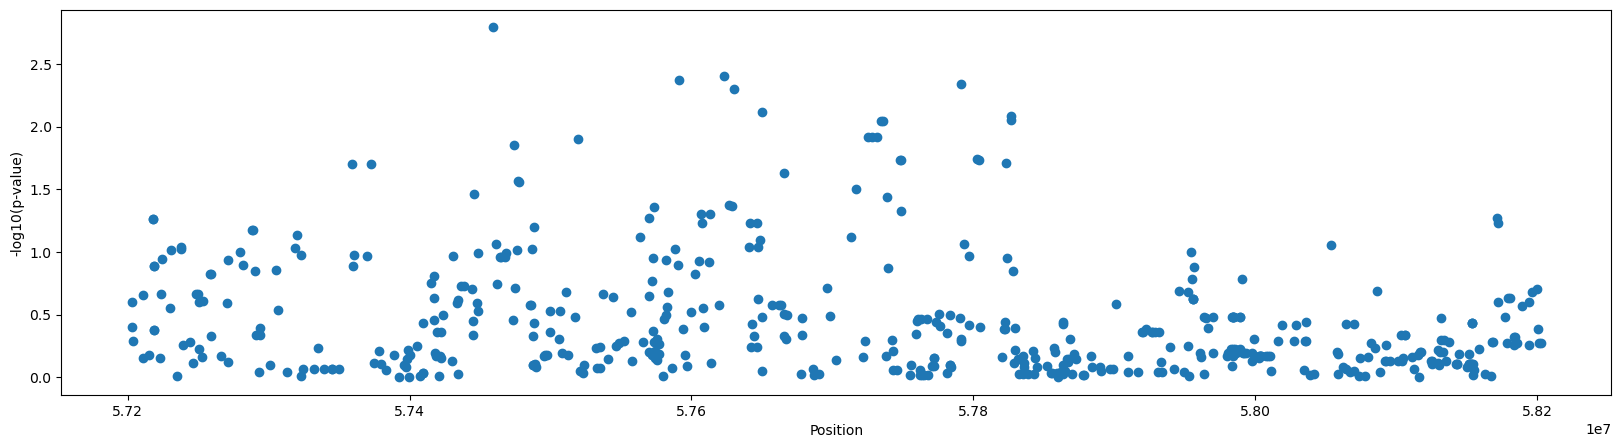

In [87]:
plt.figure(figsize=(20, 5))

plt.scatter(target_gene_linreg['pos'], target_gene_linreg['nlog10_p_val'])
plt.xlabel("Position")
plt.ylabel("-log10(p-value)")

plt.show()

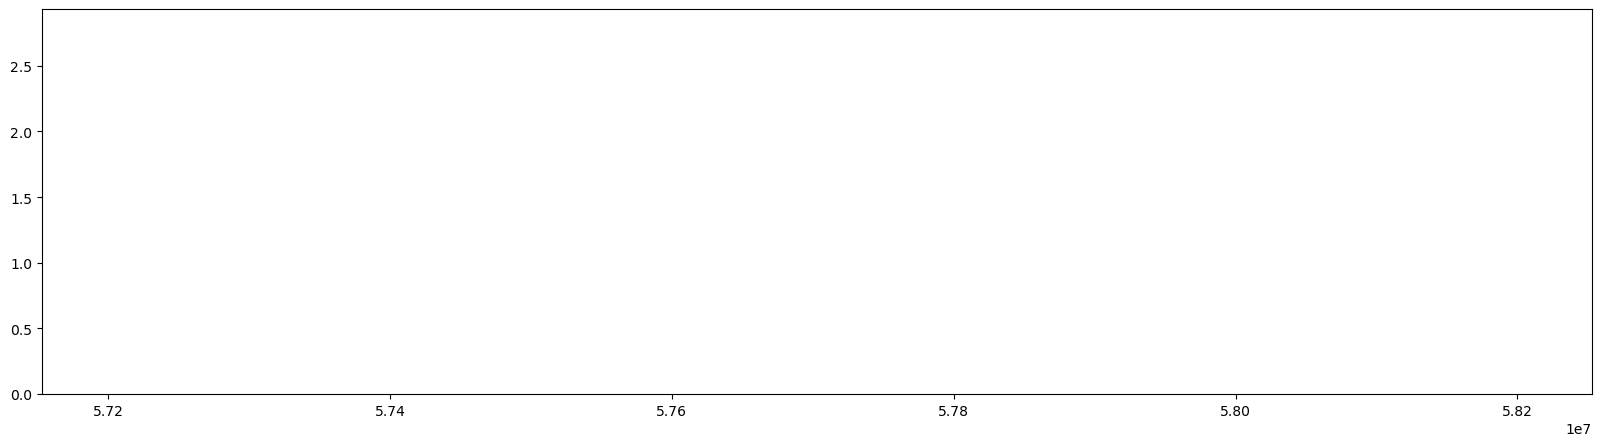

In [88]:
plt.figure(figsize=(20, 5))

plt.bar(target_gene_linreg['pos'], target_gene_linreg['nlog10_p_val'], width=0.8)
plt.show()